<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Ensemble Methods</h1>
<h3>Sergio de la Cruz Badillo, dlcruzser12@gmail.com</h3>

<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import warnings
import sys

sys.path.append("../files")
import utils

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = "retina"

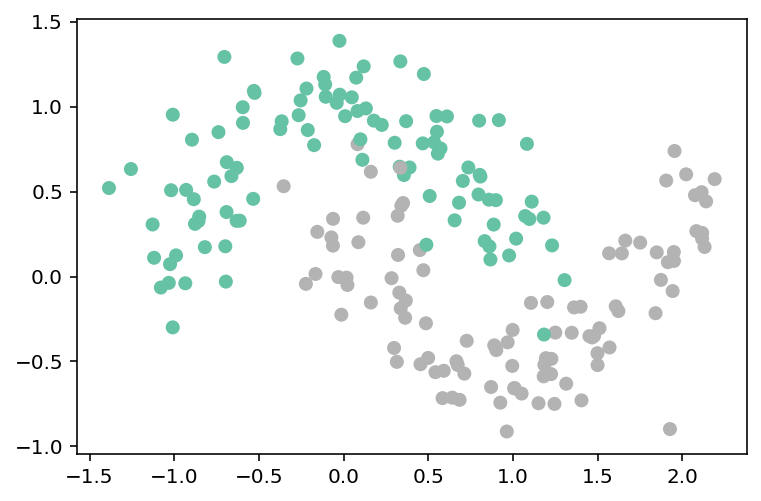

In [15]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise, random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

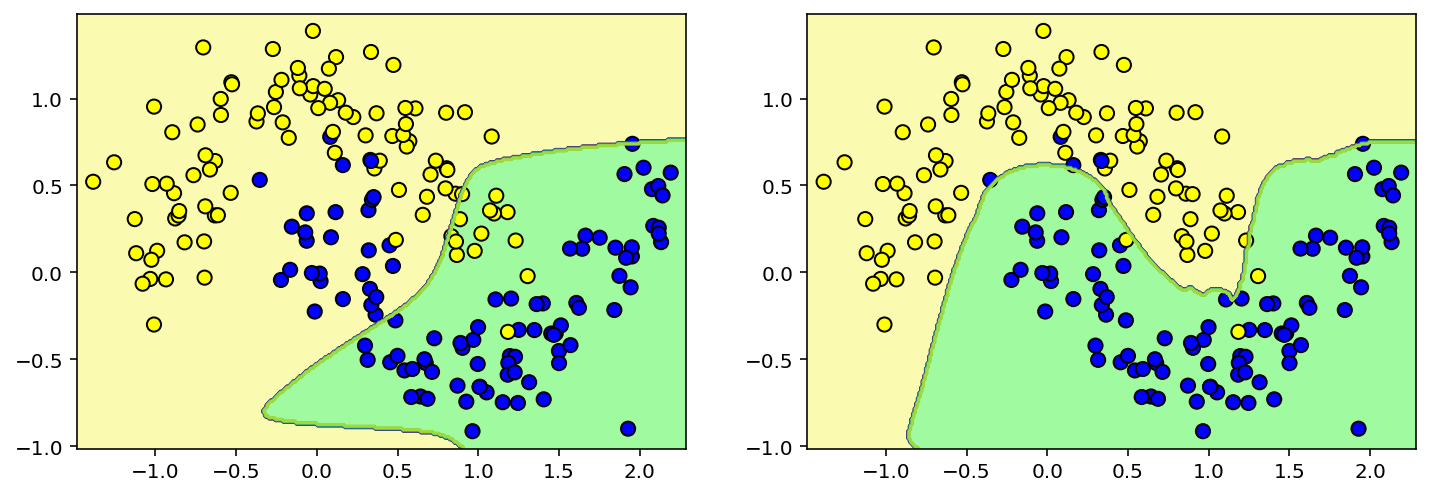

In [16]:
# Creating polynomial and logistic regression
model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("logistic", LogisticRegression(penalty='none'))
])

# Creating bagging classifier 
bagging_logreg = BaggingClassifier(model, n_estimators=100, random_state=314)

# Fitting models
model.fit(X, y)
bagging_logreg.fit(X, y)

# Ploting models
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [17]:
print("F1 score (polynomial and logistic regression):\n{}\n".format(f1_score(y_test, model.predict(X_test))))
print("F1 score (bagging classifier):\n{}".format(f1_score(y_test, bagging_logreg.predict(X_test))))

F1 score (polynomial and logistic regression):
0.7567567567567567

F1 score (bagging classifier):
0.9743589743589743
